In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

project_path = os.path.abspath("../code")  # Adatta il percorso a dove si trova il tuo progetto
sys.path.append(project_path)
from vipm_features import ResNet50FeatureExtractor
from vipm_image_retrieval import ImageRetrievalKNN, ImageRetrievalBestFit

ModuleNotFoundError: No module named 'skimage'

In [68]:
# Carica il file CSV
def load_csv(csv_path):
    data = pd.read_csv(csv_path, header=None, names=['image_name', 'label'])
    return data['image_name'].tolist(), data['label'].tolist()

# Percorsi
csv_path = '../dataset/train_small.csv'   
csv_unlabeled = '../dataset/train_unlabeled.csv'
indir = '../dataset/train_set'  # Modifica in base alla posizione delle immagini
outdir = '../features'  # Modifica in base alla posizione delle feature
os.makedirs(outdir, exist_ok=True)

In [69]:
# Carica le immagini dal CSV
image_names, labels = load_csv(csv_path)
image_names_unlabeled, _ = load_csv(csv_unlabeled)

extractor = ResNet50FeatureExtractor()
features_unlabeled, _, _ = extractor.get_features(csv=csv_unlabeled, indir=indir, outdir=outdir, normalize=True)
features_small, _, _ = extractor.get_features(csv=csv_path, indir=indir, outdir=outdir, normalize=True)


Caricamento delle feature da ../features\train_unlabeled_resnet50_features_normalized.npz
Caricamento delle feature da ../features\train_small_resnet50_features_normalized.npz


In [70]:
def visualize_retrieved_images(images, indices, predictions, class_label, outdir, num_images=10):
    # Filtra gli indici per la classe specificata
    filtered_indices = [idx for idx, pred in enumerate(predictions) if pred == class_label]
    selected_indices = filtered_indices[:num_images]

    # Visualizza le immagini recuperate
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        img_path = os.path.join(indir, images[indices[idx]])
        img = Image.open(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Retrieved {i + 1}")
    
    plt.tight_layout()
    plt.show()

In [71]:
# set seed
np.random.seed(42)

## 20% dataset

In [72]:
percent_20_random_features_unlabeled = np.random.choice(features_unlabeled.shape[0], int(features_unlabeled.shape[0]*0.2), replace=False)

In [73]:
image_names_unlabeled_numpy = np.array(image_names_unlabeled)

In [74]:
retrival = ImageRetrievalKNN(dataset=features_unlabeled[percent_20_random_features_unlabeled], queryset=features_small, queryset_labels=labels)
indices_knn, predictions_knn = retrival.retrive_images()

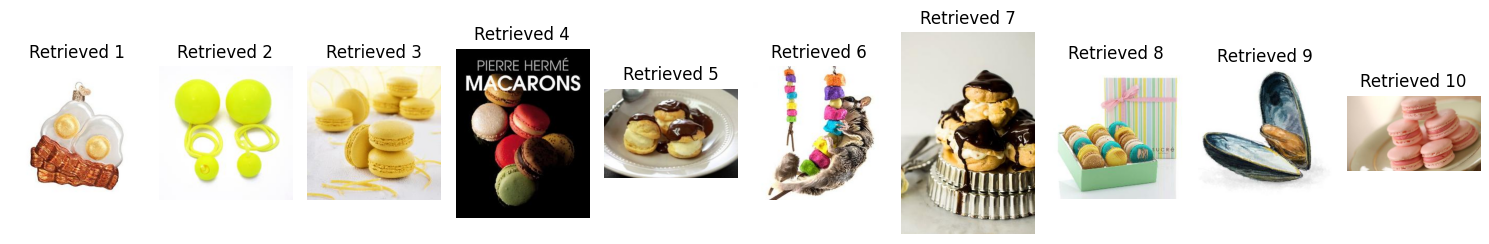

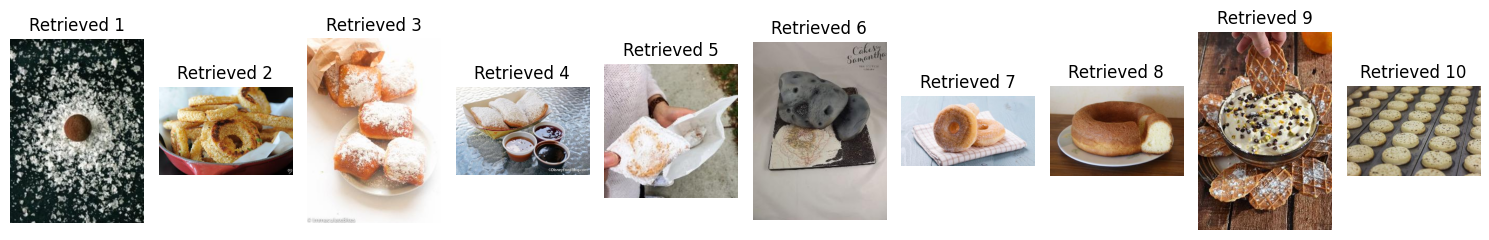

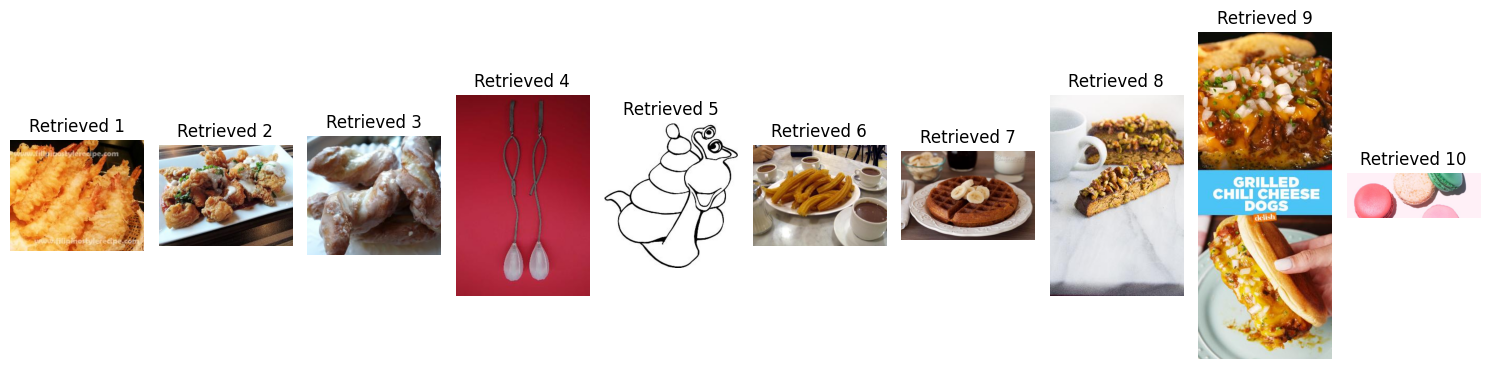

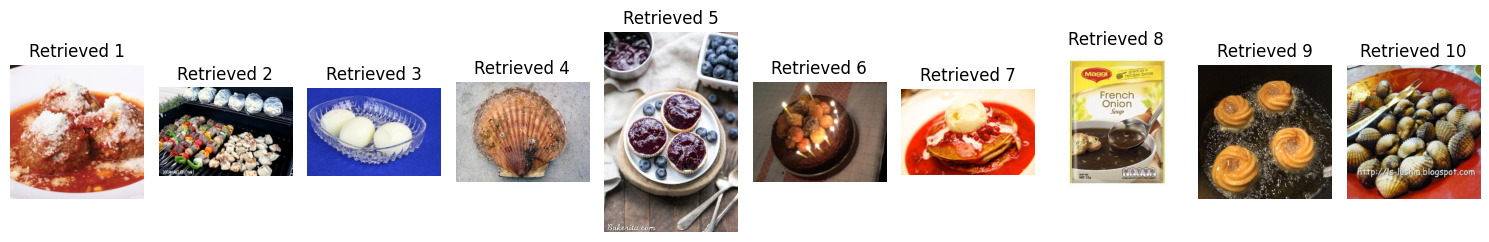

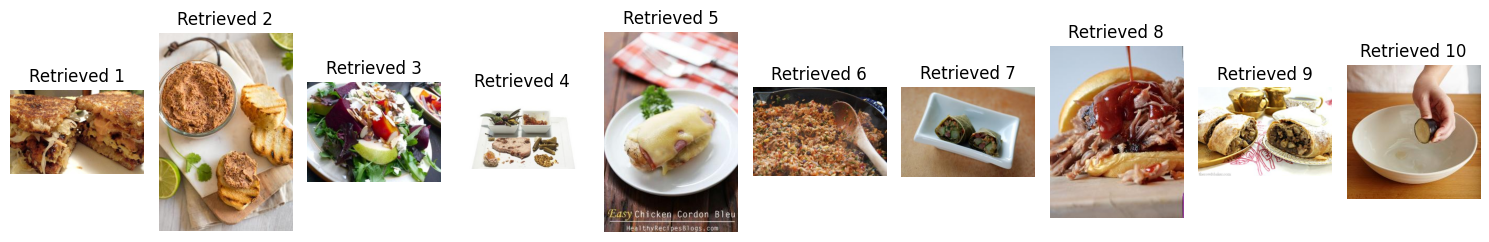

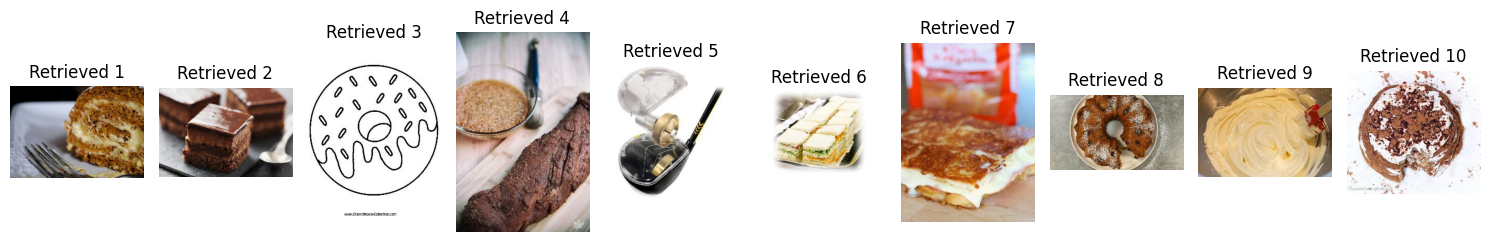

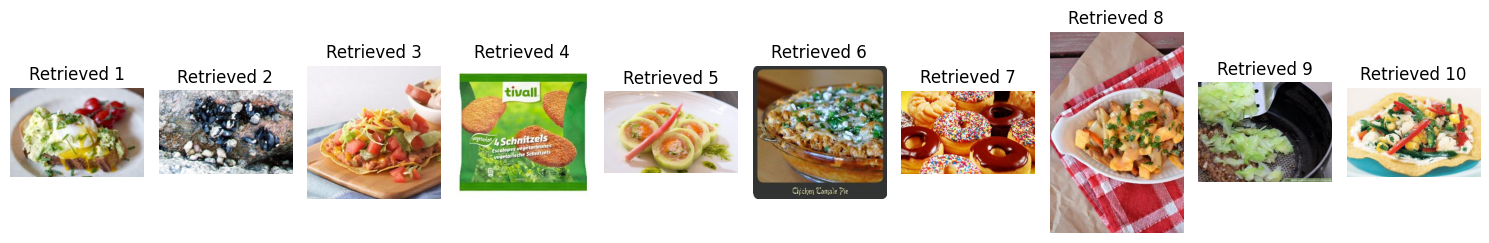

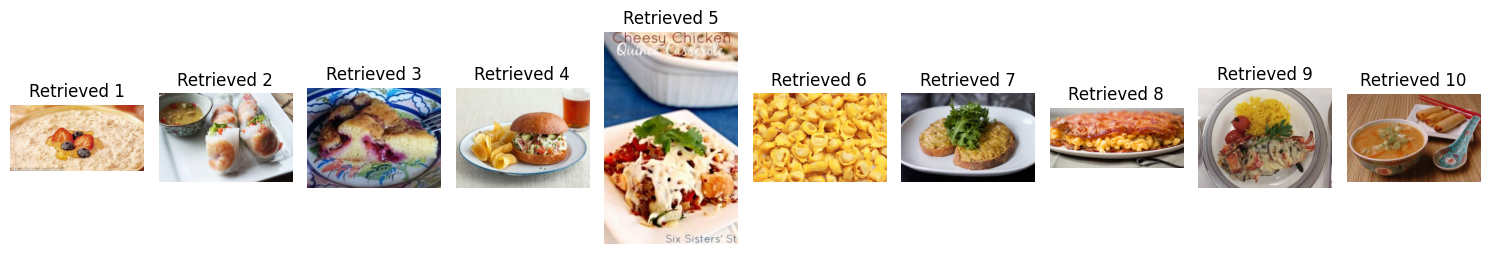

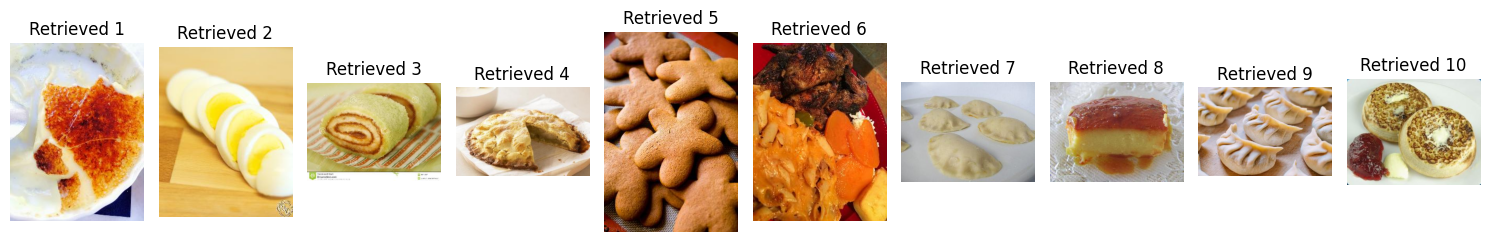

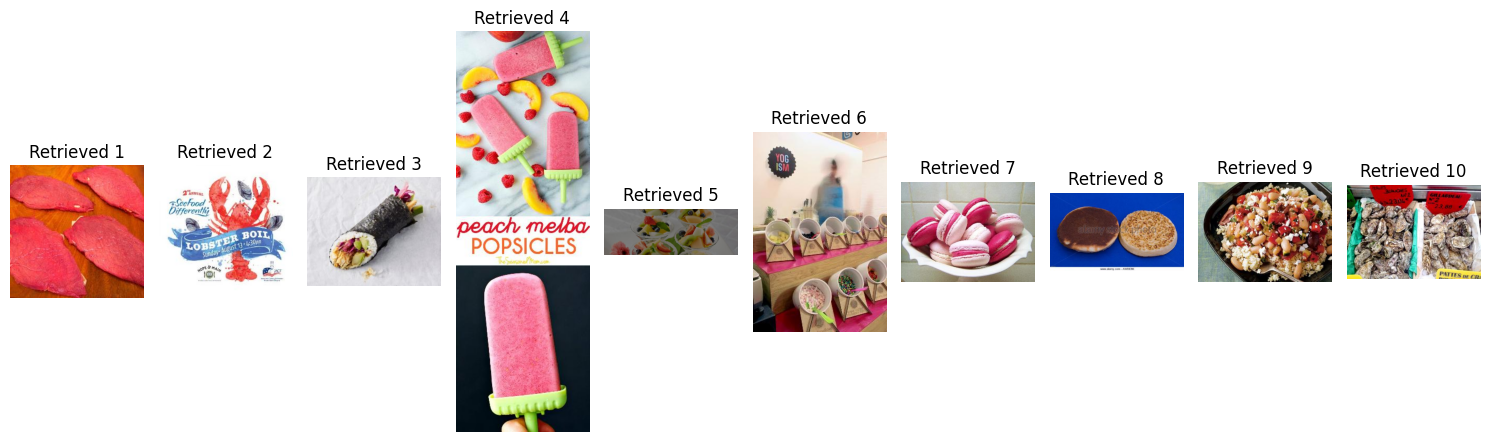

In [75]:
for class_label in range(10):
    visualize_retrieved_images(image_names_unlabeled_numpy[percent_20_random_features_unlabeled], indices_knn, predictions_knn, class_label, outdir)

In [ ]:
retrival = ImageRetrievalBestFit(dataset=features_unlabeled[percent_20_random_features_unlabeled], queryset=features_small, queryset_labels=labels, n_neighbors=10)
indices_best_fit, predictions_best_fit = retrival.retrive_images()

predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27

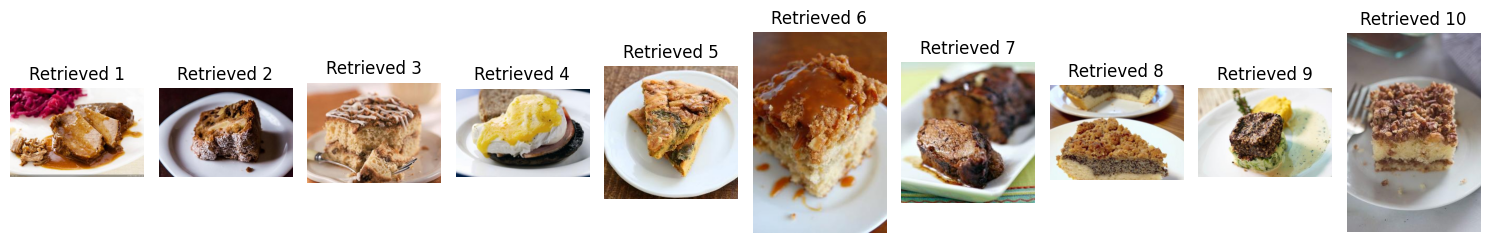

In [ ]:
for class_label in range(10):
    visualize_retrieved_images(image_names_unlabeled_numpy[percent_20_random_features_unlabeled], indices_best_fit, predictions_best_fit, class_label, outdir)